In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from matplotlib.ticker import PercentFormatter

In [2]:
df = pd.read_csv('flights_NY.csv')

In [3]:
df.head()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance
0,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400
1,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416
2,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089
3,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576
4,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762


In [4]:
df.shape[0]

336776

In [5]:
df = df.dropna()
df.shape[0]

327346

In [6]:
"""
1. По каждой авиакомпании оцените вероятность того, что задержка прилета будет положительной и
нарисуйте график,показывающий распределение этой вероятности по авиакомпаниям.
"""
carriers = sorted(df['carrier'].unique())


In [7]:
delaysCount = {"carriers": [], "probability": []}
for carrier in carriers:
    carrierFlights = df.loc[df['carrier'] == carrier]
    carriersFlightsDelayed = carrierFlights.loc[carrierFlights['arr_delay'] > 0]
    delaysCount["carriers"].append(carrier)
    delaysCount["probability"].append(carriersFlightsDelayed.shape[0] / carrierFlights.shape[0])


print(delaysCount)

{'carriers': ['9E', 'AA', 'AS', 'B6', 'DL', 'EV', 'F9', 'FL', 'HA', 'MQ', 'OO', 'UA', 'US', 'VX', 'WN', 'YV'], 'probability': [0.38377471955591536, 0.3351175384230131, 0.26657263751763044, 0.43680734148642897, 0.34439128792647616, 0.4790639430226188, 0.5756240822320118, 0.5968503937007874, 0.28362573099415206, 0.4670287973798778, 0.3448275862068966, 0.38458343428749436, 0.3705814129393374, 0.34128225175918686, 0.44038525406841583, 0.4742647058823529]}


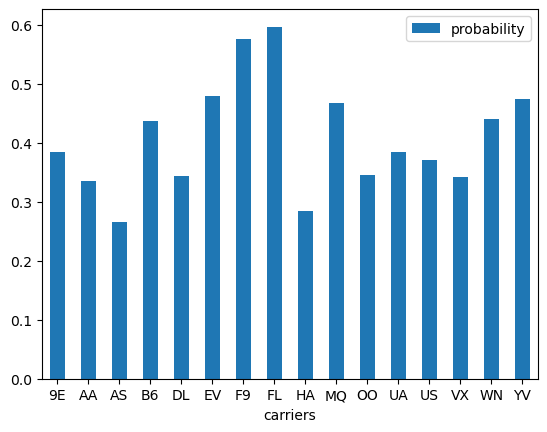

In [8]:
delayProbability = pd.DataFrame(delaysCount)
ax = delayProbability.plot.bar(x='carriers', y='probability', rot=0)

array([[<Axes: title={'center': 'distance'}>]], dtype=object)

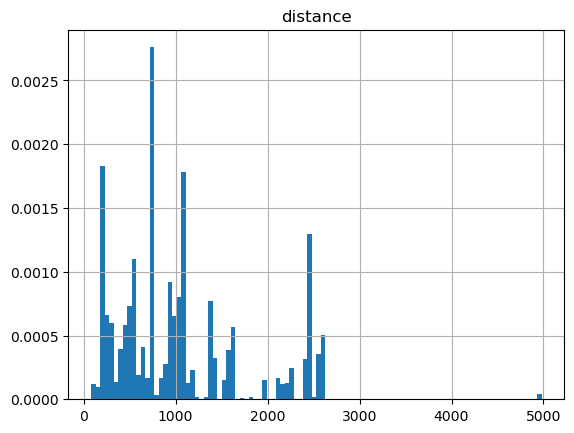

In [9]:
"""
2. Постройте гистограмму расстояния перелета distance.
Выделите на ней три группы перелетов: короткие, средние и длинные.
Какие значения distance разумно выбрать в качестве границы, разделяющей короткие.
средние и длинные перелеты? Куда летят самолеты в группе длинных перелетов?
Найдите среднее время задержки вылета в каждой из трех выделенных групп.
"""
df.hist(column='distance', bins=100, density=True)

In [10]:
# short distance flights < 100 miles
# middle distance flights from 100 miles to 1000 miles
# long distance flights > 1000 miles

In [11]:
longDistanceFlights = df.loc[df['distance'] > 1000]
print(longDistanceFlights['dest'].unique())

['IAH' 'MIA' 'BQN' 'FLL' 'PBI' 'TPA' 'LAX' 'SFO' 'DFW' 'LAS' 'MSP' 'RSW'
 'SJU' 'PHX' 'DEN' 'SNA' 'MSY' 'SLC' 'XNA' 'SEA' 'SRQ' 'SAN' 'JAC' 'HNL'
 'AUS' 'STT' 'EGE' 'HOU' 'LGB' 'BUR' 'MCI' 'SAT' 'PDX' 'SJC' 'OMA' 'OAK'
 'SMF' 'DSM' 'PSE' 'TUL' 'OKC' 'HDN' 'BZN' 'MTJ' 'EYW' 'PSP' 'ABQ' 'ANC']


In [12]:
print("Long distance flights delay:", longDistanceFlights['arr_delay'].mean())
print("Medium distance flights delay:", df.loc[(df['distance'] > 100) & (df['distance'] < 1000)]['arr_delay'].mean())
print("Short distance flights delay:", df.loc[df['distance'] < 100]['arr_delay'].mean())


Long distance flights delay: 4.02914640212225
Medium distance flights delay: 9.159422931406827
Short distance flights delay: 10.127190136275146


In [13]:
# 3 task
"""
3. Нарисуйте график среднего времени задержки вылета по месяцам и отметьте на
нем границы доверительных интервалов с уровнем доверия 0.95.
С помощью подходящего статистического теста проверьте, можно ли принять гипотезу
 о равенстве средних в январе и феврале на уровне значимости 0.05?
На уровне значимости 0.01?
"""
delaysByMonth = {"month": list(range(1, 13)), "delay": []}
for month in range(1, 13):
    delaysByMonth["delay"].append(df.loc[df['month'] == month]['arr_delay'].mean())

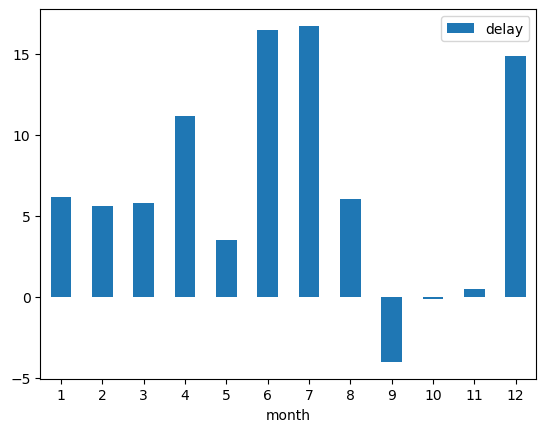

In [14]:
delay = pd.DataFrame(delaysByMonth)
ax = delay.plot.bar(x='month', y='delay', rot=0)

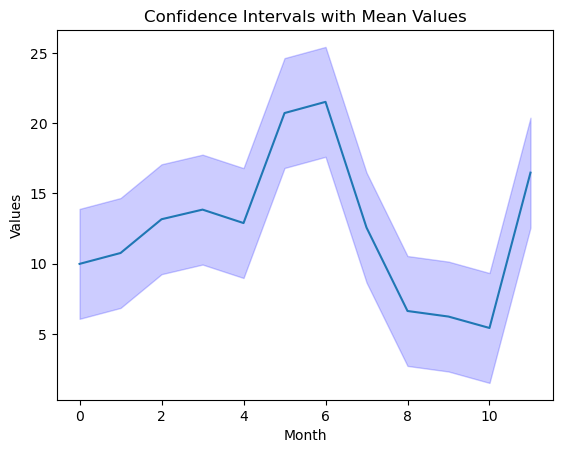

In [15]:
grouped_delays = df.groupby('month')['dep_delay'].mean().reset_index()
grouped_delays.columns = ['month', 'average_delay_time']

std_error = stats.sem(grouped_delays.average_delay_time)

lower_bound = grouped_delays.average_delay_time - std_error  *  stats.t.ppf((1 + 0.975) / 2, len(grouped_delays.average_delay_time) - 1)
upper_bound = grouped_delays.average_delay_time + std_error  *  stats.t.ppf((1 + 0.975) / 2, len(grouped_delays.average_delay_time) - 1)

# Создаем график
plt.plot(grouped_delays.average_delay_time, label='Mean values')

# Добавляем границы доверительных интервалов
plt.fill_between(range(len(grouped_delays.average_delay_time)), lower_bound, upper_bound, alpha=0.2, color='blue')

# Подписываем оси
plt.xlabel('Month')
plt.ylabel('Values')
plt.title('Confidence Intervals with Mean Values')

# Показываем график
plt.show()

In [16]:
grouped_delays.head()

,month,average_delay_time
0,1,9.985491
1,2,10.760239
2,3,13.164289
3,4,13.849187
4,5,12.891709


In [17]:
january_data = grouped_delays.loc[grouped_delays['month'] == 1]['average_delay_time']
february_data = grouped_delays.loc[grouped_delays['month'] == 2]['average_delay_time']
t_stat, p_value = stats.ttest_ind(january_data, february_data)
if p_value > 0.05:
    print("При уровне значимости 0.05 гипотеза о равенстве средних принимается.")
else:
    print("При уровне значимости 0.05 гипотеза о равенстве средних отвергается.")

# Проверяем гипотезу на уровне значимости 0.01
t_stat, p_value = stats.ttest_ind(january_data, february_data, alternative='less')
if p_value > 0.01:
    print("При уровне значимости 0.01 гипотеза о равенстве средних принимается.")
else:
    print("При уровне значимости 0.01 гипотеза о равенстве средних отвергается.")

При уровне значимости 0.05 гипотеза о равенстве средних отвергается.
При уровне значимости 0.01 гипотеза о равенстве средних отвергается.


C:\Users\Nikolay\anaconda\Lib\site-packages\scipy\stats\_stats_py.py:7030: RuntimeWarning: invalid value encountered in scalar divide
  svar = ((n1 - 1) * v1 + (n2 - 1) * v2) / df


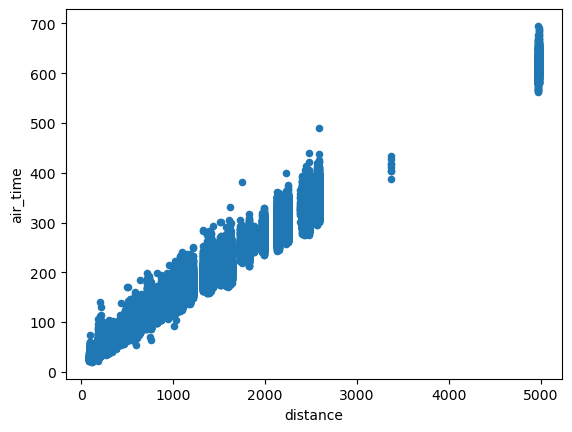

In [18]:
""" 4. Найдите коэффициент корреляции между расстоянием distance и временем полета air_time.
Постройте точечную диаграмму в осях distance (х) и air_time (y).
Найдите коэффициенты линейной регрессии и нанесите полученную прямую на график.
Как можно интерпретировать смысл коэффициентов полученной линейной модели?
"""
ax1 = df.plot.scatter(x='distance', y='air_time')

In [19]:
# correlation coefficient using pandas method .corr()
df[["distance", "air_time"]].corr(method='pearson')


,distance,air_time
distance,1.00000,0.99065
air_time,0.99065,1.00000


In [20]:
# to find coefficitents of a linear regression, we will use the method of least squares
x_sum = 0
squared_x_sum = 0
y_sum = 0
x_y_sum = 0
N = df.shape[0]
for x, y in zip(df['distance'], df['air_time']):
    x_sum += x
    squared_x_sum += x ** 2
    y_sum += y
    x_y_sum += x * y
# according to the Cramer's rule
det = (squared_x_sum * N) - (x_sum ** 2)
det_a = (x_y_sum * N) - (x_sum * y_sum)
a = det_a / det

det_b = (squared_x_sum * y_sum) - (x_y_sum * x_sum)
b = det_b / det
print(f"Coefficients of a linear regression y = ax + b: {a}, {b}")

Coefficients of a linear regression y = ax + b: 0.12611932467386067, 18.46657812776041


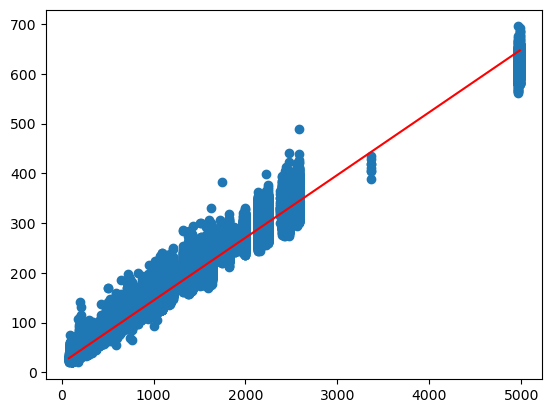

In [21]:
x = list(range(df["distance"].min(), df["distance"].max()))
plt.plot(x, [a*el + b for el in x], color="red")
plt.scatter(df["distance"], df["air_time"])
plt.show()

In [22]:
"""
Интерпретация смысла коэффициентов линейной регрессии: коэффициент наклона ≈ 0.12,
таким образом при увеличении дистанции рейса, например, на 1000 миль время рейса увеличится на 120 минут.
То есть, средняя скорость самолета ≈ 500 миль/ч.
В случае если, дистанция рейса = 0 миль, значение линейной регрессии 0.12 * 0 + 18 = 18 минут.
Можно предположить, о том что среднее время подготовки рейса (инструктаж по правилам безопасности, выезд на ВПП и т.д) равняется 18 минут.
"""

'\nИнтерпретация смысла коэффициентов линейной регрессии: коэффициент наклона ≈ 0.12,\nтаким образом при увеличении дистанции рейса, например, на 1000 миль время рейса увеличится на 120 минут.\nТо есть, средняя скорость самолета ≈ 500 миль/ч.\nВ случае если, дистанция рейса = 0 миль, значение линейной регрессии 0.12 * 0 + 18 = 18 минут.\nМожно предположить, о том что среднее время подготовки рейса (инструктаж по правилам безопасности, выезд на ВПП и т.д) равняется 18 минут.\n'

In [23]:
""" 5. Постройте нормированную гистограмму распределения задержки прилета по
тем рейсам, которые вылетели в пределах +/-15 минут от времени в расписании.
Сделайте предположение о том, каким распределением может описываться полученная
гистограмма, оцените параметры этого распределения и нанесите график плотности
на график с гистограммой.
"""

# Фильтруем задержку вылета в диапазоне [-15; 15]
df = df.loc[(df['dep_delay'] >= -15) & (df['dep_delay'] <= 15)]
df = df.reset_index(drop=True)

Text(0, 0.5, '% полётов')

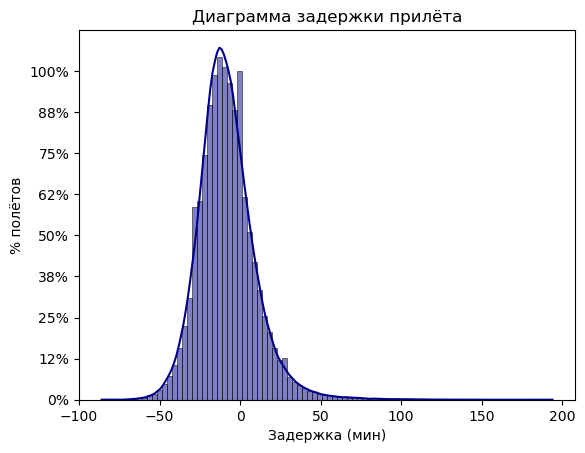

In [24]:
# Диаграмма
sns.histplot(df['arr_delay'], kde=True,
             bins=int(180/2), color = 'darkblue')
# Процентное форматирование
plt.gca().yaxis.set_major_formatter(PercentFormatter(20000))
# Оси
plt.title('Диаграмма задержки прилёта')
plt.xlabel('Задержка (мин)')
plt.ylabel('% полётов')

In [25]:
# Вычисляем параметры распределения
m = df['arr_delay'].mean().round(2)
v = df['arr_delay'].var().round(2)

AttributeError: 'float' object has no attribute 'round'

In [ ]:
print("Нормальное распределение с матожиданием", m, ", дисперсией", v, "(мин)")

In [ ]:
""" 6. Постройте модель логистической регрессии, которая будет предсказывать, что задержка прилета составит более 15 минут.
Какие признаки вы будете использовать?
Какие новые признаки, на основе имеющихся, можете предложить?
Какова точность полученной модели (precision, recall, accuracy)?
"""

In [ ]:
""" Для построения модели логистической регрессии мною было принято решения использовать все признаки, за исключением:

1) dep_time, arr_time, так как время вылета в общем случае не будет влиять на задержку
2) arr_delay, значения данного столбца были преобразованы в arr_delay_binary (0, если задержка меньше 15 минут, 1 в противном случае) и использованы как ответы на задачу
3) tailnum
4) day, year, так как данные значения не должны играть существенной роли, в отличие от месяца (в разные месяцы в среднем разная погода, что может сказаться на задержках)
5) flight, origin, dest. Опять же, данные не играют роли.

Из новых признаков предлагаю реализовать arr_delay_binary, описанную выше. Также можно было добавить признак time_of_day, так как, возможно, в разные временные промежутки дня статистика будет меняться.
"""

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score

# Загружаю датасет
df = pd.read_csv('flights_NY.csv')

# Удаляю из датасета все строки с NaN
df = df.dropna()

# Чтобы разделить все данные на 2 класса, добавлю новый столбец arr_delay_binary. Если задержка более 15 минут, значение будет 1, иначе 0
df['arr_delay_binary'] = (df['arr_delay'] > 15).astype(int)


df = df.drop('dep_time', axis=1)
df = df.drop('arr_time', axis=1)
df = df.drop('arr_delay', axis=1)
df = df.drop('tailnum', axis=1)
df = df.drop('day', axis=1)
df = df.drop('year', axis=1)
df = df.drop('flight', axis=1)
df = df.drop('origin', axis=1)
df = df.drop('dest', axis=1)

#Факторизирую значение столбца carrier
df['carrier'], uniques = pd.factorize(df['carrier'])

X = df.drop('arr_delay_binary', axis=1)
y = df['arr_delay_binary']

# Разделение на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=85)

# Создание модели логистической регрессии
model = LogisticRegression(solver='lbfgs', max_iter=1000)

# Обучение модели
model.fit(X_train, y_train)

# Прогнозирование
y_pred = model.predict(X_test)

#Оценка модели

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Precision/Точность:", precision)
print("Recall/Отзыв:", recall)
print("Accuracy/Общая точность:", accuracy)




In [ ]:
""" Полученные результаты:
  Precision: 0.8893205120040757
  Recall: 0.7206997987304536
  Accuracy: 0.9126312059337464
"""